#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


#### Loading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head()


Saving heart.csv to heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Statistical Measures

In [3]:
print("Dataset Info:\n")
print(df.info())

print("\nDescriptive Statistics:\n")
print(df.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Descriptive Statistics:

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0

#### Skewness and Kurtosis


In [13]:
print("Skewness of each column:\n")
print(df.skew())

print("\nKurtosis of each column:\n")
print(df.kurtosis())


Skewness of each column:

age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

Kurtosis of each column:

age        -0.525618
sex        -1.277531
cp         -1.149500
trestbps    0.991221
chol        3.996803
fbs         1.889859
restecg    -1.309614
thalach    -0.088822
exang      -1.523205
oldpeak     1.314471
slope      -0.647129
ca          0.701123
thal        0.250827
target     -2.001123
dtype: float64


#### Value Counts for Categorical Column

In [14]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())



Value counts for sex:

sex
1    713
0    312
Name: count, dtype: int64

Value counts for cp:

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Value counts for fbs:

fbs
0    872
1    153
Name: count, dtype: int64

Value counts for restecg:

restecg
1    513
0    497
2     15
Name: count, dtype: int64

Value counts for exang:

exang
0    680
1    345
Name: count, dtype: int64

Value counts for slope:

slope
1    482
2    469
0     74
Name: count, dtype: int64

Value counts for ca:

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

Value counts for thal:

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64


#### Standard Deviation & Coefficient of Variation (CV)



In [15]:
# Coefficient of Variation = std / mean
cv = (df.std() / df.mean()) * 100
print("Coefficient of Variation (%):\n")
print(cv)


Coefficient of Variation (%):

age          16.666543
sex          66.182701
cp          109.252770
trestbps     13.309392
chol         20.972565
fbs         238.849580
restecg      99.645397
thalach      15.428264
exang       140.461358
oldpeak     109.663078
slope        44.591489
ca          136.684037
thal         26.707672
target       97.447198
dtype: float64


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR):\n")
print(IQR)


Interquartile Range (IQR):

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


#### Checking Missing values

In [4]:
print("Missing Values:\n")
print(df.isnull().sum())


Missing Values:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Visualisation of Dataset

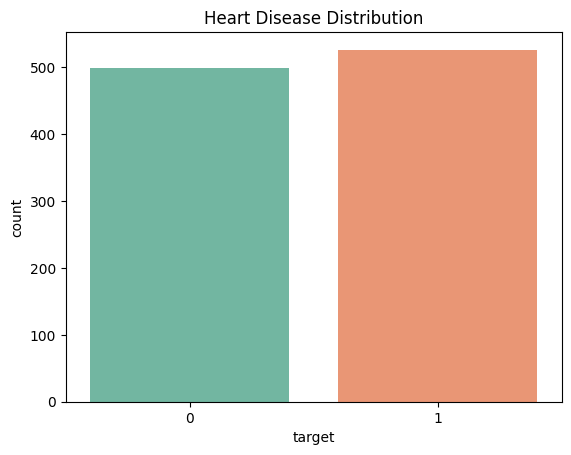

In [7]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution')
plt.show()


#### Heatmap of Correlation

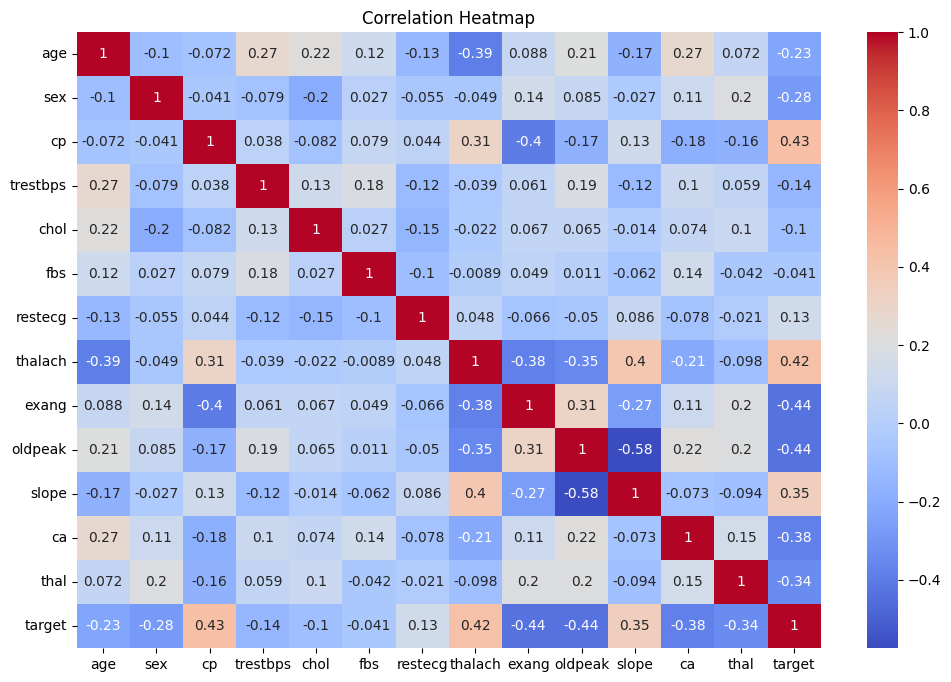

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Boxplot: Age vs Heart Disease


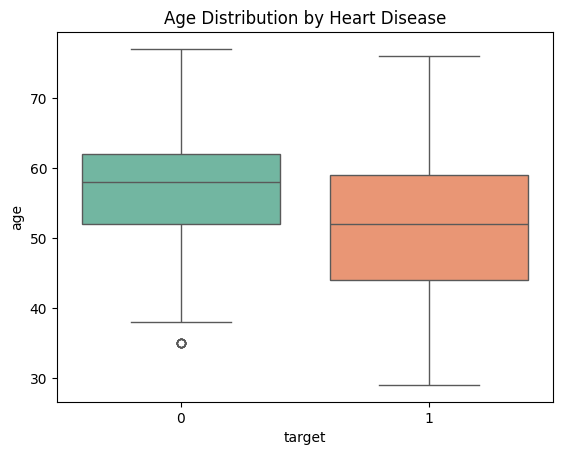

In [10]:
sns.boxplot(x='target', y='age', data=df, palette="Set2")
plt.title('Age Distribution by Heart Disease')
plt.show()


#### Chest Pain vs Target (Disease Presence )


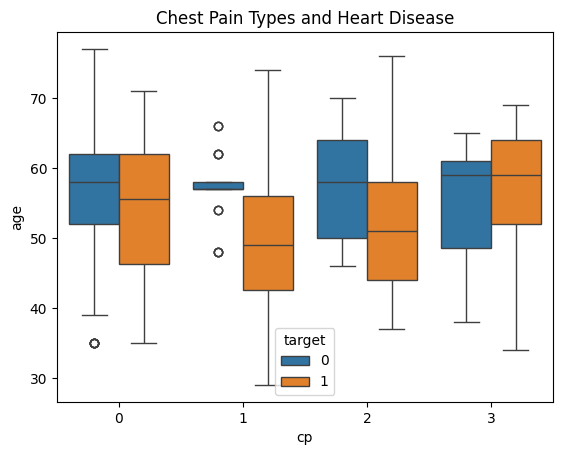

In [11]:
sns.boxplot(x='cp', y='age', hue='target', data=df)
plt.title('Chest Pain Types and Heart Disease')
plt.show()


#### Preprocessing the Data



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


####Logistic Regression



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize model
log_reg = LogisticRegression()

# Step 2: Fit the model to training data
log_reg.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred = log_reg.predict(X_test)

# Step 4: Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7951219512195122
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Logistic regression estimates the **probability** of class labels (binary).

It’s fast and works well with linearly separable data.



#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



A tree splits features to make decisions.

Easy to interpret but may overfit on small datasets.



#### Random Forest



In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Random Forest is a collection of many Decision Trees (ensemble).

It reduces overfitting and increases accuracy.



#### Support Vector Machine (SVM)


In [21]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8878048780487805
[[85 17]
 [ 6 97]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



SVM finds the best boundary between classes (maximum margin).

Works well in high-dimensional spaces.



#### K-Nearest Neighbors (KNN)



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8341463414634146
[[79 23]
 [11 92]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



KNN classifies based on majority of nearby data points.

Simple but can be slow on large datasets.

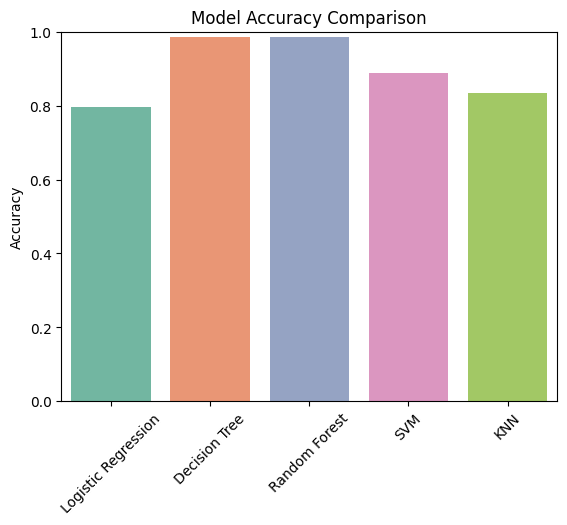

In [33]:
# New patient input (replace with actual values)
new_patient = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Scale
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
prob = model.predict_proba(new_patient_scaled)

# Result
result = "HAS heart disease" if prediction[0] == 1 else "does NOT have heart disease"
print(f"Prediction: Patient {result}")
print(f"Prediction Probability: {prob[0]}")


Prediction: Patient HAS heart disease
Prediction Probability: [0.01 0.99]
